In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
train_path = '/content/drive/MyDrive/inspiring/Pollen_datasets/datas/train'
valid_path = '/content/drive/MyDrive/inspiring/Pollen_datasets/datas/test'

In [6]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 1s 0us/step


In [7]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [8]:
 # useful for getting number of classes
folders = glob('/content/drive/MyDrive/inspiring/Pollen_datasets/datas/train/*')

In [9]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [10]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [13]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/inspiring/Pollen_datasets/datas/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/inspiring/Pollen_datasets/datas/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 11414 images belonging to 5 classes.
Found 11414 images belonging to 5 classes.


In [14]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/5
357/357 [==============================] - 5932s 17s/step - loss: 0.4862 - accuracy: 0.8415 - val_loss: 0.2392 - val_accuracy: 0.9227
Epoch 2/5
357/357 [==============================] - 281s 788ms/step - loss: 0.2834 - accuracy: 0.9017 - val_loss: 0.2143 - val_accuracy: 0.9231
Epoch 3/5
357/357 [==============================] - 287s 803ms/step - loss: 0.2549 - accuracy: 0.9125 - val_loss: 0.2312 - val_accuracy: 0.9189
Epoch 4/5
357/357 [==============================] - 284s 796ms/step - loss: 0.2352 - accuracy: 0.9215 - val_loss: 0.2002 - val_accuracy: 0.9290
Epoch 5/5
357/357 [==============================] - 289s 809ms/step - loss: 0.2275 - accuracy: 0.9207 - val_loss: 0.1575 - val_accuracy: 0.9444


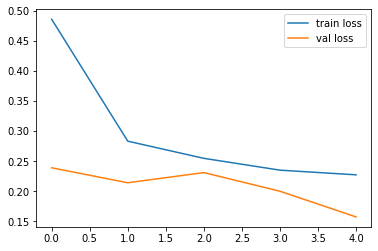

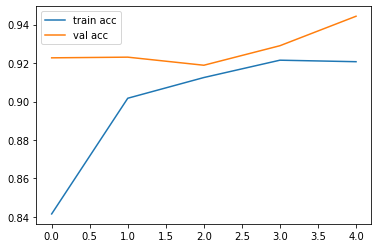

<Figure size 432x288 with 0 Axes>

In [18]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [24]:
from tensorflow.keras.preprocessing  import image as I

In [25]:
# Predict on a image.
file = I.load_img("/content/drive/MyDrive/inspiring/Pollen_datasets/datas/train/CUP/20191119T223343479-151-0.png", target_size=(224, 224))
x = I.img_to_array(file)
x = np.expand_dims(x, axis=0)
image = np.vstack([x])

# Predict.
prediction = model.predict(image)
print(prediction)

[[0. 1. 0. 0. 0.]]
